<a href="https://colab.research.google.com/github/prissyyy/Tugas-Kuliah-Prissy/blob/main/10_DBSCAN-dan-Hierarchical-Versi-Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rabu, 8 Desember 2021 (Tugas Mata Kuliah Data Mining pertemuan ke-10 topik Analisis Cluster: Hierarchical Clustering & Density Clustering)

###DBSCAN (Density Based Spatial Clustering of Application with Noise)

Penerapan DBSCAN pada cluster spherical data

In [ ]:
# Import library
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
# Generate sample data
dataset = pd.read_csv('https://raw.githubusercontent.com/prissyyy/Studi-Independen/main/Data_Set/Iris.csv')
print(dataset)
X = dataset.iloc[:, [1, 3]].values
X = StandardScaler().fit_transform(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm           Label
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
# Menghitung DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)

[ 0  0  0  0  0 -1  0  0  0  0 -1  0  0  0 -1 -1 -1  0 -1 -1  0 -1  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0 -1 -1  0 -1  0
 -1  0  1  1  1 -1  1  1 -1 -1  1  1 -1  1 -1  1  1  1  1  1 -1 -1 -1  1
 -1  1  1  1  1  1  1 -1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1  1 -1  1  1
  1  1 -1  1 -1  2  1  1  1  1 -1  1 -1 -1 -1  2  1 -1 -1 -1  1 -1 -1 -1
 -1  2  2  2 -1 -1  2  1  2  1  2 -1 -1  1  1 -1 -1  1  1  1 -1 -1  2 -1
 -1 -1 -1  1 -1  1]


In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 57


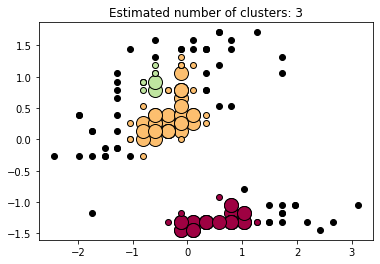

In [ ]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

##HIERARCHICAL CLUSTERING

In [21]:
# Import library
import numpy as np
import seaborn as sns
import pandas as pd

In [22]:
# Import dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/prissyyy/Studi-Independen/main/Data_Set/Iris.csv')
print(dataset)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm           Label
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


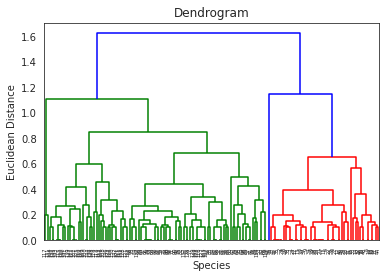

In [28]:
# Clustering menggunakan dendrogram untuk menentukan angka cluster yang tepat
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Euclidean Distance')
plt.show()

In [29]:
# Menjalankan Hierarchical Clustering ke dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)

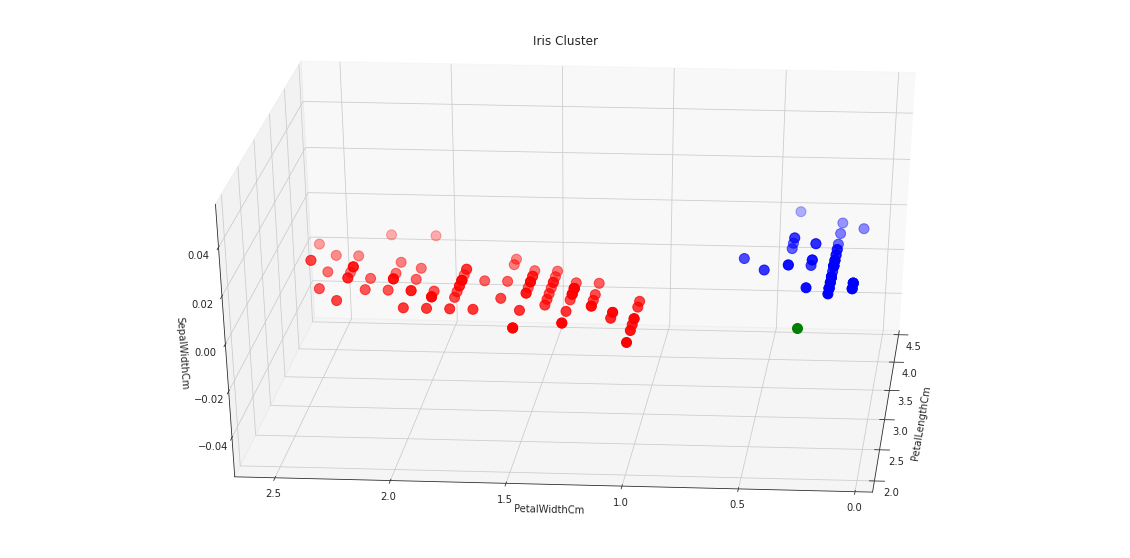

In [30]:
# Visualisasi hasil clusters
sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
ax.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
ax.view_init(30, 185)
plt.title('Iris Cluster')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
ax.set_zlabel('SepalWidthCm')
plt.show()